In [ ]:
# linear algebra
import numpy as np 
from random import randint


# data processing
import pandas as pd 
from sklearn import preprocessing

# sql query
import pyodbc 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score
from sklearn.inspection import permutation_importance


from sklearn import datasets
from sklearn.model_selection import validation_curve

from sklearn.preprocessing import StandardScaler
import imblearn

# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
import pyodbc 
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = '172.31.0.203\SVRRep,52679' 
database = 'StageDB' 
username = 'StageReader' 
password = 'hxBTCm*tn8)3[x-H' 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [ ]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = """
        SELECT 
        CJ.CustomerId
     , CJ.MobilePhone
     , CJ.CountOrders
     , CJ.CountOkala
     , CJ.CountHyper
     , CJ.CountOfogh
     , CJ.CountFruit
     , CJ.FirstBuyToNow
     , CJ.LastBuyToNow
     , CJ.CreatedOnToNow
     , CJ.CountDiscount
     , CJ.AVGOrderTotal
     , CJ.IsFraud
     , CJ.FraudId
     , CJ.HaveCurrentLocation
     , CJ.IsBlackList
     , CD.DeviceId
FROM   dbo.BI_CustomerJourney               CJ
       JOIN dbo.BI_Marketing_CustomerDevice CD
           ON CD.CustomerId = CJ.CustomerId;


"""

In [ ]:
CustomerInfo = pd.read_sql(query, cnxn)
# pd.read_csv('CustomerInfo.csv')


In [ ]:
# CustomerInfo.to_csv('CustomerInfo.csv' , header = True , index = False)

In [ ]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = """
        SELECT YearMonth
        FROM dbo.BI_AllOrders
        GROUP BY
        YearMonth;

"""



# query = SELECT """OrderId
#      , ProductId
#      , StoreId
#      , Quantity
#      , ConsumerPrice
#      , OkalaPrice
#      , OrderState
#      , OrderItemState
#      , YearMonth
#      , Day"""
# FROM   dbo.BI_AllOrders;




In [ ]:
DateBlock = pd.read_sql(query, cnxn)

In [ ]:
for II in DateBlock['YearMonth'].tolist():
    query = """
        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = """ + str(II)
    print(query)
    X = pd.read_sql(query, cnxn)
    if II == DateBlock.iloc[0]['YearMonth']:
        DataOrders = X
    else:
        DataOrders = DataOrders.append(X)


        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202003

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202004

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202005

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202006

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202007

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202008

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202009

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202010

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202011

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202012

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202101

        SELECT * 
        FROM dbo.BI_AllOrders
        WHERE YearMonth = 202102

        SELECT 

In [ ]:
DataOrders.to_csv('DataOrders.csv' , header = True , index = False)

In [ ]:
DataOrders = pd.read_csv('DataOrders.csv')

In [ ]:
DataOrders.columns

Index(['OrderId', 'CustomerId', 'StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice', 'OrderState', 'OrderStatus',
       'OrderItemState', 'Delay', 'YearMonth', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount'],
      dtype='object')

# Data

In [ ]:
CustomerInfo = pd.read_csv('CustomerInfo.csv')

# Deleting redundant 'asd' DeviceId

In [ ]:
x = CustomerInfo[CustomerInfo['DeviceId']=='asd']

In [ ]:
y = CustomerInfo[CustomerInfo['DeviceId']!='asd']

In [ ]:
z = y[y['CustomerId'].isin(x['CustomerId'])]

In [ ]:
print(
    x['CustomerId'].nunique(),
    z['CustomerId'].nunique(),
    y['CustomerId'].nunique(),
)

24223 23752 2334904


droping the redundand asd deviceId

In [ ]:
CustomerInfo_cleaned = CustomerInfo.drop(
    CustomerInfo[(CustomerInfo['CustomerId'].isin(z['CustomerId'])) & (CustomerInfo['DeviceId']=='asd')].index
)

In [ ]:
CustomerInfo.columns

Index(['CustomerId', 'MobilePhone', 'CountOrders', 'CountOkala', 'CountHyper',
       'CountOfogh', 'CountFruit', 'FirstBuyToNow', 'LastBuyToNow',
       'CreatedOnToNow', 'CountDiscount', 'AVGOrderTotal', 'IsFraud',
       'FraudId', 'HaveCurrentLocation', 'IsBlackList', 'DeviceId'],
      dtype='object')

# Excluding Missuse

In [ ]:
DeviceId = CustomerInfo_cleaned.drop(columns = 
                            ['CountOkala', 'CountHyper',
       'CountOfogh', 'CountFruit', 'FirstBuyToNow', 'LastBuyToNow',
       'CreatedOnToNow', 'AVGOrderTotal', 'IsFraud',
       'FraudId', 'HaveCurrentLocation', 'IsBlackList']
                            ).drop_duplicates()

###
print(
    DeviceId['CustomerId'].nunique() ,
    DeviceId['MobilePhone'].nunique(),
    DeviceId['DeviceId'].nunique() , 
    DeviceId.shape[0])

###
MultiNumbers = DeviceId.groupby('DeviceId').agg({
    'CustomerId':'nunique'
}).reset_index().drop_duplicates().rename(columns = {'CustomerId':'NumOfCustomerIds'})

###
MultiDevice = DeviceId.groupby('CustomerId').agg({
    'DeviceId':'nunique' , 'CountOrders':'first'
}).reset_index().drop_duplicates().rename(columns = {'DeviceId':'NumOfDevices'})

###
# MultiNumbers.sort_values(by = 'NumOfCustomerIds' , ascending = False)
NormalDevices = MultiNumbers[MultiNumbers['NumOfCustomerIds']<4].reset_index()


2335375 2335375 1198669 2804153


In [ ]:
NormalDevices5 = MultiNumbers[MultiNumbers['NumOfCustomerIds']<6].reset_index()
NormalCustomerInfo_cleaned5 = CustomerInfo_cleaned[CustomerInfo_cleaned['DeviceId'].isin(NormalDevices5['DeviceId'])]
NormalCustomerInfo_cleaned5['CustomerId'].nunique()

1567837

In [ ]:
NormalCustomerInfo_cleaned = CustomerInfo_cleaned[CustomerInfo_cleaned['DeviceId'].isin(NormalDevices['DeviceId'])]

In [ ]:
NormalCustomerInfo_cleaned['CustomerId'].nunique()

1329422

# Organic customers

at least %20 percent of their orders are organic

In [ ]:
NormalCustomerInfo_cleaned['OrganicCount'] = (- NormalCustomerInfo_cleaned['CountDiscount']) + (NormalCustomerInfo_cleaned['CountOrders'])
NormalCustomerInfo_cleaned['OrganicPercent'] = ((NormalCustomerInfo_cleaned['OrganicCount'])*100)/(NormalCustomerInfo_cleaned['CountOrders'])

<ipython-input-12-e5e0b828e151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NormalCustomerInfo_cleaned['OrganicCount'] = (- NormalCustomerInfo_cleaned['CountDiscount']) + (NormalCustomerInfo_cleaned['CountOrders'])
<ipython-input-12-e5e0b828e151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NormalCustomerInfo_cleaned['OrganicPercent'] = ((NormalCustomerInfo_cleaned['OrganicCount'])*100)/(NormalCustomerInfo_cleaned['CountOrders'])


In [ ]:
# print(CustomerInfo['DeviceId'].nunique()/CustomerInfo.shape[0] , NormalCustomerInfo_cleaned['DeviceId'].nunique()/NormalCustomerInfo_cleaned.shape[0])

In [ ]:
# # OrganicCustomers = NormalCustomerInfo_cleaned[NormalCustomerInfo_cleaned['Organic']>20]
# OrganicCustomers = NormalCustomerInfo_cleaned[NormalCustomerInfo_cleaned['OrganicCount']>0]

# print('Percent of organic customers with respect to Normal customers:' ,  OrganicCustomers['CustomerId'].nunique()*100/ NormalCustomerInfo_cleaned['CustomerId'].nunique())

In [ ]:
NormalCustomerInfo_cleaned.columns

Index(['CustomerId', 'MobilePhone', 'CountOrders', 'CountOkala', 'CountHyper',
       'CountOfogh', 'CountFruit', 'FirstBuyToNow', 'LastBuyToNow',
       'CreatedOnToNow', 'CountDiscount', 'AVGOrderTotal', 'IsFraud',
       'FraudId', 'HaveCurrentLocation', 'IsBlackList', 'DeviceId',
       'OrganicCount', 'OrganicPercent'],
      dtype='object')

Almost 23 percent of non_missusing customers are Organic customers

# Order Data DeviceCleaned and non-missusing 

In [ ]:
DataOrders_cleaned_nmu = DataOrders[DataOrders['CustomerId'].isin(
    NormalCustomerInfo_cleaned['CustomerId'])].reset_index(drop=True)

Orders = DataOrders_cleaned_nmu.drop(columns=
    [ 'StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice',
       'OrderItemState', 'DiscountID', 'DiscountAmount']
).drop_duplicates().reset_index(drop=True).fillna(0)

DataOrders_cleaned_nmu['Date'] = (DataOrders_cleaned_nmu['YearMonth']*100) + (DataOrders_cleaned_nmu['Day'])
DataOrders_cleaned_nmu.columns

Index(['OrderId', 'CustomerId', 'StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice', 'OrderState', 'OrderStatus',
       'OrderItemState', 'Delay', 'YearMonth', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount', 'Date'],
      dtype='object')

In [ ]:
DataOrders.CustomerId.nunique()

3823053

In [ ]:
DataOrders_cleaned_nmu.CustomerId.nunique()

1205231

# Defining Customer State

In [ ]:
DataOrders_cleaned_nmu['CustomerState'] = 1

# Organic by month

Organic Customers before 2020-3 count as organic

In [ ]:
from datetime import datetime
date_format = "%Y%m%d"
# a = datetime.strptime('20200331', date_format)
# b = datetime.strptime('20200201', date_format)
# delta = b - a
# print(delta.days)

In [ ]:
Today = '20210505'
# datetime.today().strftime('%Y%m%d')
TodayFromMarchDays = datetime.strptime(Today, '%Y%m%d') - datetime.strptime('20200320', '%Y%m%d')
OldCustomers = NormalCustomerInfo_cleaned[NormalCustomerInfo_cleaned['CreatedOnToNow']>(TodayFromMarchDays.days)]
NewCustomers = NormalCustomerInfo_cleaned[NormalCustomerInfo_cleaned['CreatedOnToNow']<(TodayFromMarchDays.days)+1]

Old Customers that were churned before march 2020:

In [ ]:
OldChurnedCustomers = OldCustomers[OldCustomers.LastBuyToNow > TodayFromMarchDays.days]

In [ ]:
BeforeMarchStartPurchasing = NormalCustomerInfo_cleaned[NormalCustomerInfo_cleaned['FirstBuyToNow']>(TodayFromMarchDays.days)]

Customers that have not been churned before March 2020, but may have started ordering before March 2020:

In [ ]:
Customers = NormalCustomerInfo_cleaned[~NormalCustomerInfo_cleaned.CustomerId.isin(OldChurnedCustomers.CustomerId)]

Customers that started ordering before March 2020, and have atleast 1 organic purchase and have not been churned before March 2020: 

In [ ]:
OldOrganicCustomers = BeforeMarchStartPurchasing[BeforeMarchStartPurchasing['OrganicCount']>0]
OldOrganicCustomers2 = BeforeMarchStartPurchasing[BeforeMarchStartPurchasing['OrganicPercent']>20]

print(OldOrganicCustomers.CustomerId.nunique() , OldOrganicCustomers2.CustomerId.nunique(),
      OldOrganicCustomers.CustomerId.nunique() - OldOrganicCustomers2.CustomerId.nunique())

28048 19326 8722


Customers that have become Organic after March 2020 : 

First we have to find the Organic Purchases that Customers that are not OldOrganic customers have made: 


In [ ]:
CustomersNotOldOrganic = Customers[~Customers.CustomerId.isin(OldOrganicCustomers.CustomerId)]

In [ ]:
DataOrders_cleaned_nmu['Organic'] = (DataOrders_cleaned_nmu['DiscountAmount'].isna()) & (DataOrders_cleaned_nmu['DiscountAmount']!=np.nan).astype(int)

In [ ]:
OrganicPurchase = DataOrders_cleaned_nmu[DataOrders_cleaned_nmu['Organic']==1]
NewOrganicPurchase = OrganicPurchase[OrganicPurchase['CustomerId'].isin(CustomersNotOldOrganic.CustomerId)]

In [ ]:
NewFirstOrganicPurchase = NewOrganicPurchase.groupby('CustomerId').agg({
    'Date':'min' , 'YearMonth':'min' , 'OrderId':'min'
}).reset_index()

In [ ]:
NewOrganicCustomers_delivered = NewOrganicPurchase[
(NewOrganicPurchase.OrderId.isin(NewFirstOrganicPurchase.OrderId)) & (NewOrganicPurchase['OrderState']==5)].drop(columns={
    'OrderId','StoreId', 'ProductId', 'Quantity','YearMonth',
       'ConsumerPrice', 'OkalaPrice', 'OrderStatus',
       'OrderItemState', 'Delay', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount', 
       'Organic',  'OrderState'
}).drop_duplicates().reset_index(drop=True).rename(columns={
    'Date':'OrganicDate'
})

In [ ]:
NewOrganicCustomers_delivered['OrganicYearMonth'] = NewOrganicCustomers_delivered['OrganicDate'].apply(
lambda x: (datetime.strptime(str(x),date_format)).strftime('%Y%m')
).astype(int)

In [ ]:
NewOrganicCustomers_delivered['CustomerState'] = NewOrganicCustomers_delivered.CustomerState + 1

In [ ]:
NewOrganicCustomers_Monthly = NewOrganicCustomers_delivered.groupby('OrganicYearMonth').agg({
    'CustomerId':'nunique'
}).reset_index().rename(columns={
    'CustomerId':'NumOrOrganicCustomers'
})

In [ ]:
NewOrganicCustomers_Monthly

,OrganicYearMonth,NumOrOrganicCustomers
0,202003,1635
1,202004,3657
2,202005,3164
3,202006,3950
4,202007,7280
5,202008,9400
6,202009,10805
7,202010,17163
8,202011,35685
9,202012,36997


Labeling first organic purchase for new customers

In [ ]:
DataOrders_cleaned_nmu['FirstOrganic'] = (DataOrders_cleaned_nmu['OrderId'].isin(NewFirstOrganicPurchase['OrderId'])).astype(int)

# Churning and Churned Customers

Last purchase of all customers

In [ ]:
LastPurchase = DataOrders_cleaned_nmu.groupby('CustomerId').agg({
    'OrderId':'max' , 'YearMonth':'max' , 'Date':'max'
}).reset_index().rename(columns={
    'Date':'LastOrderDate'
})

##

LastPurchase['LastOrderToToday'] = LastPurchase['LastOrderDate'].apply(
    lambda x: (datetime.strptime(Today, '%Y%m%d') - datetime.strptime(str(x), '%Y%m%d')).days)

##

LastPurchase['Churn'] = (
    LastPurchase['LastOrderToToday']>89
).astype(int)

Churned customers

In [ ]:
print(- LastPurchase[LastPurchase.CustomerId.isin(OldCustomers.CustomerId)].CustomerId.nunique() + OldCustomers.CustomerId.nunique())

3645


In [ ]:
# OldChurnedOrganicCustomers = OldOrganicCustomers[OldOrganicCustomers['LastBuyToNow']>TodayFromMarchDays.days]
# OldChurnedOrganicCustomers['ChurnDate'] = '20200229'
# OldChurnedOrganicCustomers['ChurnYearMonth'] = '202002'
# OldChurnedOrganicCustomers_ID = OldChurnedOrganicCustomers.drop(columns=[
#      'MobilePhone', 'CountOrders', 'CountOkala', 'CountHyper',
#        'CountOfogh', 'CountFruit', 'FirstBuyToNow', 'LastBuyToNow',
#        'CreatedOnToNow', 'CountDiscount', 'AVGOrderTotal', 'IsFraud',
#        'FraudId', 'HaveCurrentLocation', 'IsBlackList', 'DeviceId',
#        'OrganicCount', 'OrganicPercent'
# ]).reset_index()


<ipython-input-837-0ea88e06fe4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OldChurnedOrganicCustomers['ChurnDate'] = '20200229'
<ipython-input-837-0ea88e06fe4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OldChurnedOrganicCustomers['ChurnYearMonth'] = '202002'


In [ ]:
ChurnedCustomers = LastPurchase[LastPurchase['Churn']==1].sort_values(by='LastOrderDate').reset_index(drop = True)

##

# delta = timedelta(days=90)
ChurnedCustomers['ChurnDate']  = ChurnedCustomers['LastOrderDate']
# .apply(
#     lambda x: (datetime.strptime(str(x),date_format) + delta).strftime(date_format)).astype(np.int64)

##

ChurnedCustomers['ChurnYearMonth'] = ChurnedCustomers['ChurnDate'].apply(
lambda x: (datetime.strptime(str(x),date_format)).strftime('%Y%m')
).astype(int)


In [ ]:
# ChurnedCustomers_ID = ChurnedCustomers.drop(columns = [
#     'OrderId', 'YearMonth', 'LastOrderDate',
#        'LastOrderToToday', 'Churn'
# ]).drop_duplicates().reset_index().append(OldChurnedOrganicCustomers_ID)

Text(0, 0.5, 'Total Churned Customers')

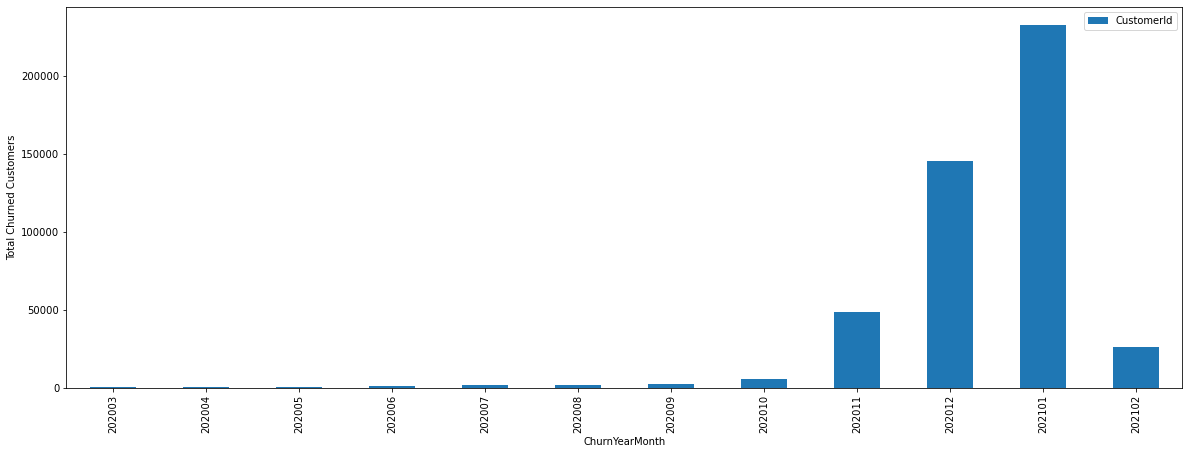

In [ ]:
ChurnedCustomers.groupby('ChurnYearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7)) 
plt.ylabel('Total Churned Customers')

In [ ]:
ChurnedCustomers.columns

Index(['CustomerId', 'OrderId', 'YearMonth', 'LastOrderDate',
       'LastOrderToToday', 'Churn', 'ChurnDate', 'ChurnYearMonth'],
      dtype='object')

# Churned Organic Customers

ChurnedCustomers = all churned customers

NewOrganicCustomers


In [ ]:
print(NewOrganicCustomers_delivered.CustomerId.nunique() , ChurnedCustomers.CustomerId.nunique())

202989 466172


In [ ]:
ChurnedNewOrganicCustomers_Date = ChurnedCustomers.merge(NewOrganicCustomers_delivered, 
                                                    left_on = 'CustomerId' , 
                                                    right_on = 'CustomerId').reset_index(drop=True)

In [ ]:
ChurnedNewOrganicCustomers = ChurnedNewOrganicCustomers_Date[
    (ChurnedNewOrganicCustomers_Date['LastOrderDate']>ChurnedNewOrganicCustomers_Date['OrganicDate'])
].drop(columns='OrganicDate')

In [ ]:
ChurnedOldOrganicCustomers = ChurnedCustomers[ChurnedCustomers.CustomerId.isin(OldOrganicCustomers.CustomerId)].reset_index(drop=True)

In [ ]:
print(ChurnedNewOrganicCustomers.CustomerId.nunique() , ChurnedNewOrganicCustomers_Date.CustomerId.nunique(),ChurnedOldOrganicCustomers.CustomerId.nunique() )
# , ChurnedNewOrganicCustomers_Date[ChurnedNewOrganicCustomers_Date['LastOrderDate']>ChurnedNewOrganicCustomers_Date['OrganicDate']].CustomerId.nunique())

34914 61323 6038


In [ ]:
ChurnedOrganicCustomers = ChurnedOldOrganicCustomers.append(ChurnedNewOrganicCustomers).reset_index(drop=True)

In [ ]:
print(
    ChurnedCustomers.CustomerId.nunique(),
    ChurnedNewOrganicCustomers.CustomerId.nunique(),
    ChurnedOldOrganicCustomers.CustomerId.nunique(),
    ChurnedOrganicCustomers.CustomerId.nunique()
)

466172 34914 6038 40952


Text(0, 0.5, 'Churned Organic Customers')

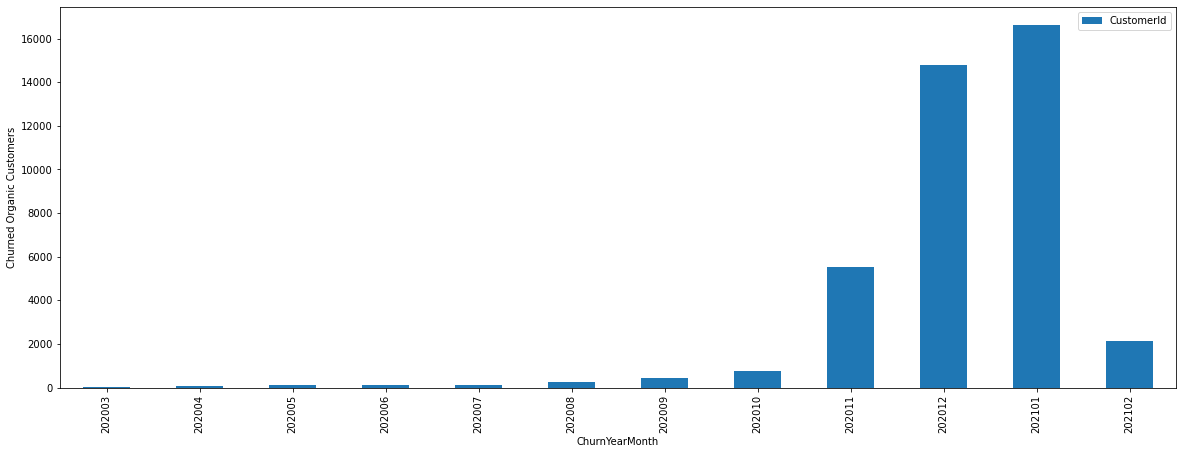

In [ ]:
ChurnedOrganicCustomers.groupby('ChurnYearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))

plt.ylabel('Churned Organic Customers')

# Churned Organic to Organic

In [ ]:
OldOrganicCustomers_ID = OldOrganicCustomers.drop(columns=[
    'MobilePhone', 'CountOrders', 'CountOkala', 'CountHyper',
       'CountOfogh', 'CountFruit', 'FirstBuyToNow', 'LastBuyToNow',
       'CreatedOnToNow', 'CountDiscount', 'AVGOrderTotal', 'IsFraud',
       'FraudId', 'HaveCurrentLocation', 'IsBlackList', 'DeviceId',
       'OrganicCount', 'OrganicPercent'
])

In [ ]:
OldOrganicCustomers_ID['OrganicDate'] = int('20200319')

In [ ]:
OrganicCustomers = NewOrganicCustomers_delivered.append(
    OldOrganicCustomers_ID).sort_values(by='OrganicDate'
                                       ).drop_duplicates()

In [ ]:
OrganicCustomers

,CustomerId,OrganicDate,CustomerState,OrganicYearMonth
348197,517931,20200319,NaN,NaN
30468,254460,20200319,NaN,NaN
30484,255264,20200319,NaN,NaN
30489,311169,20200319,NaN,NaN
30494,214888,20200319,NaN,NaN
...,...,...,...,...
202807,6994324,20210504,2.0,202105.0
202800,7028751,20210504,2.0,202105.0
201302,814975,20210504,2.0,202105.0
201917,4047029,20210504,2.0,202105.0


In [ ]:
OrganicCustomers['OrganicYearMonth'] = OrganicCustomers['OrganicDate'].apply(
lambda x: (datetime.strptime(str(x),date_format)).strftime('%Y%m')
).astype(int)

In [ ]:
OrganicCustomers_Monthly = OrganicCustomers.groupby('OrganicYearMonth').agg({
    'CustomerId':'nunique'
}).reset_index().rename(columns={
    'CustomerId':'MonthlyNumCus'
})
OrganicCustomers_Monthly['NumOfOrganicCustomers'] = OrganicCustomers_Monthly['MonthlyNumCus'].cumsum()

In [ ]:
OrganicCustomers

,CustomerId,OrganicDate,CustomerState,OrganicYearMonth
348197,517931,20200319,NaN,202003
30468,254460,20200319,NaN,202003
30484,255264,20200319,NaN,202003
30489,311169,20200319,NaN,202003
30494,214888,20200319,NaN,202003
...,...,...,...,...
202807,6994324,20210504,2.0,202105
202800,7028751,20210504,2.0,202105
201302,814975,20210504,2.0,202105
201917,4047029,20210504,2.0,202105


In [ ]:
ChurnedOrganicCustomers

,CustomerId,OrderId,YearMonth,LastOrderDate,LastOrderToToday,Churn,ChurnDate,ChurnYearMonth,CustomerState,OrganicYearMonth
0,216752,1632485,202003,20200321,410,1,20200321,202003,NaN,NaN
1,128909,1632604,202003,20200321,410,1,20200321,202003,NaN,NaN
2,228023,1633199,202003,20200321,410,1,20200321,202003,NaN,NaN
3,689503,1636601,202003,20200322,409,1,20200322,202003,NaN,NaN
4,287066,1646814,202003,20200327,404,1,20200327,202003,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
40947,2002429,10297613,202102,20210204,90,1,20210204,202102,2.0,202012.0
40948,3227739,10289465,202102,20210204,90,1,20210204,202102,2.0,202011.0
40949,1982629,10302379,202102,20210204,90,1,20210204,202102,2.0,202008.0
40950,1981238,10326055,202102,20210204,90,1,20210204,202102,2.0,202008.0


Text(0, 0.5, 'Organic Customers')

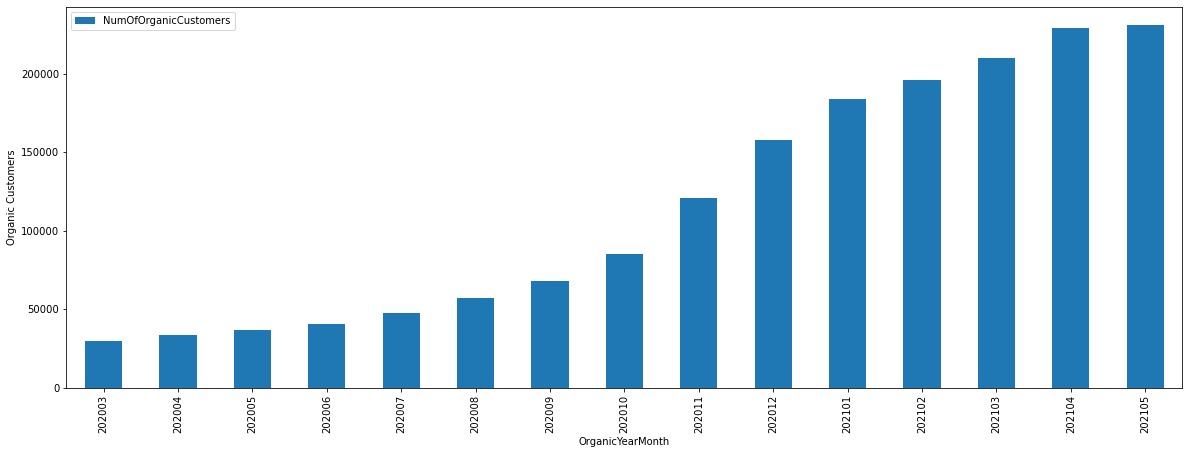

In [ ]:
OrganicCustomers_Monthly.groupby('OrganicYearMonth').agg({
    'NumOfOrganicCustomers':'max'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Organic Customers')

In [ ]:
ChurnedOrganicCustomers_Monthly = ChurnedOrganicCustomers.groupby('ChurnYearMonth').agg({
    'CustomerId':'nunique'
}).reset_index().rename(columns={
    'CustomerId':'NumOfChurnedOrganicCustomers'
})

In [ ]:
test = OrganicCustomers_Monthly.merge(ChurnedOrganicCustomers_Monthly , left_on='OrganicYearMonth' , right_on='ChurnYearMonth')
test['ChurnOrganicToOrganic'] = test['NumOfChurnedOrganicCustomers']*100/test['NumOfOrganicCustomers']

In [ ]:
test

,OrganicYearMonth,MonthlyNumCus,NumOfOrganicCustomers,ChurnYearMonth,NumOfChurnedOrganicCustomers,ChurnOrganicToOrganic
0,202003,29683,29683,202003,11,0.037058
1,202004,3657,33340,202004,75,0.224955
2,202005,3164,36504,202005,108,0.295858
3,202006,3950,40454,202006,109,0.269442
4,202007,7280,47734,202007,138,0.289102
5,202008,9400,57134,202008,233,0.407813
6,202009,10805,67939,202009,438,0.644696
7,202010,17163,85102,202010,770,0.904797
8,202011,35685,120787,202011,5537,4.584103
9,202012,36997,157784,202012,14802,9.381179


Text(0, 0.5, 'Percent Of Churned Organic Customers')

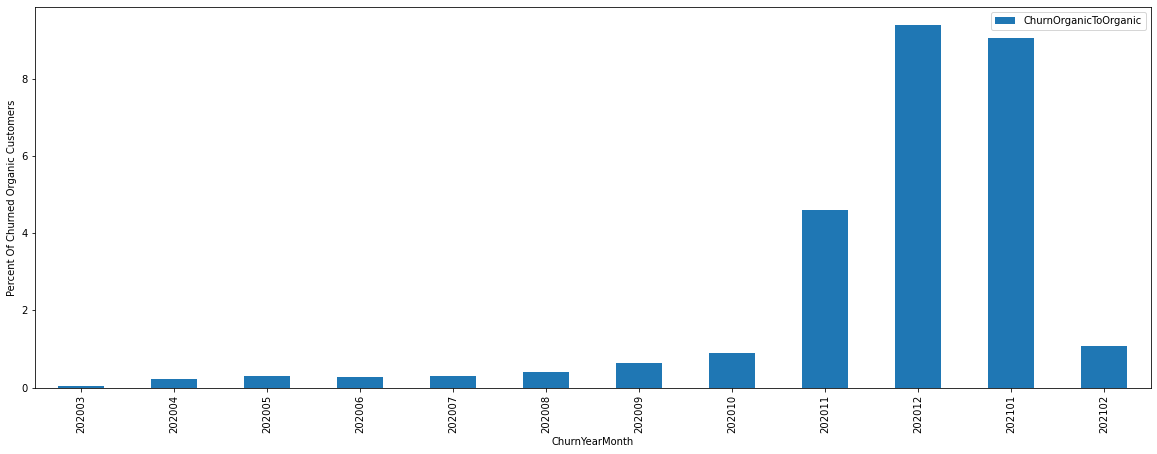

In [ ]:
test.plot(x = 'ChurnYearMonth' , y='ChurnOrganicToOrganic' 
    ,kind = 'bar',figsize = (20,7))
plt.ylabel('Percent Of Churned Organic Customers')

# Canceled Churned vs Non-Canceled Churned

In [ ]:
CanceledOrders = DataOrders_cleaned_nmu[DataOrders_cleaned_nmu.OrderState==-1].drop(columns={
     'CustomerId', 'StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice', 'OrderState', 'OrderStatus',
       'OrderItemState', 'Delay', 'YearMonth', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount', 'Date',
       'Organic', 'FirstOrganic'
}).drop_duplicates().reset_index(drop=True)


In [ ]:
CanceledLastPurchase = LastPurchase[LastPurchase.OrderId.isin(CanceledOrders.OrderId)]

In [ ]:
CanceledLastPurchase_OrganicCustomers = CanceledLastPurchase[
    CanceledLastPurchase.CustomerId.isin(OrganicCustomers.CustomerId)]

In [ ]:
CanceledLastPurchase_ChurnedOrganicCustomers = CanceledLastPurchase_OrganicCustomers[
    CanceledLastPurchase_OrganicCustomers.CustomerId.isin(ChurnedCustomers.CustomerId)]

In [ ]:
print(CanceledLastPurchase_OrganicCustomers.CustomerId.nunique() , 
     CanceledLastPurchase_ChurnedOrganicCustomers.CustomerId.nunique(), 
     CanceledOrders.OrderId.nunique(), 
     CanceledLastPurchase.OrderId.nunique())

8420 2565 722513 52504


,CustomerId
count,11.000000
mean,233.181818
std,364.808119
min,6.000000
25%,13.000000
50%,31.000000
75%,279.000000
max,985.000000


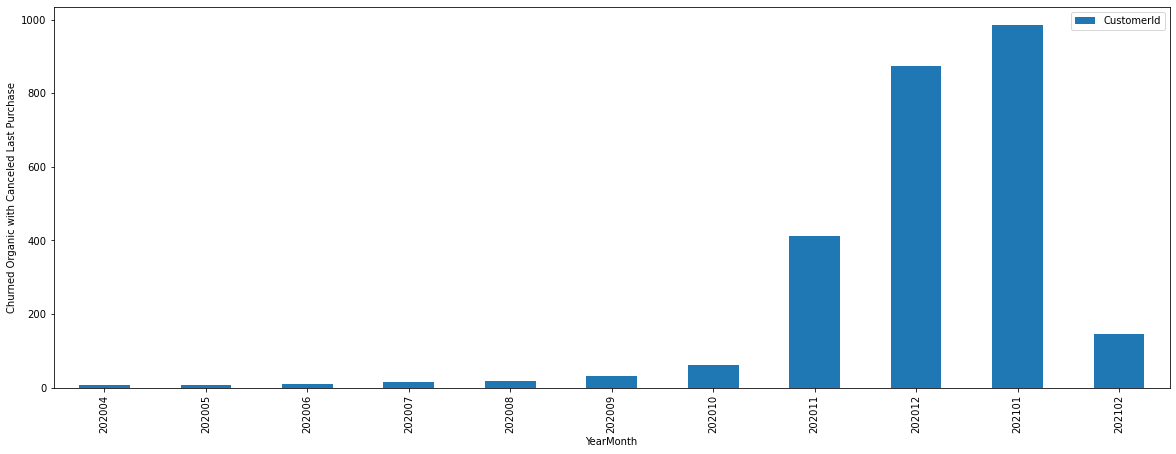

In [ ]:
CanceledLastPurchase_ChurnedOrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Churned Organic with Canceled Last Purchase')
CanceledLastPurchase_ChurnedOrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).describe()

,CustomerId
count,14.000000
mean,601.428571
std,847.476772
min,6.000000
25%,15.750000
50%,237.000000
75%,879.000000
max,3105.000000


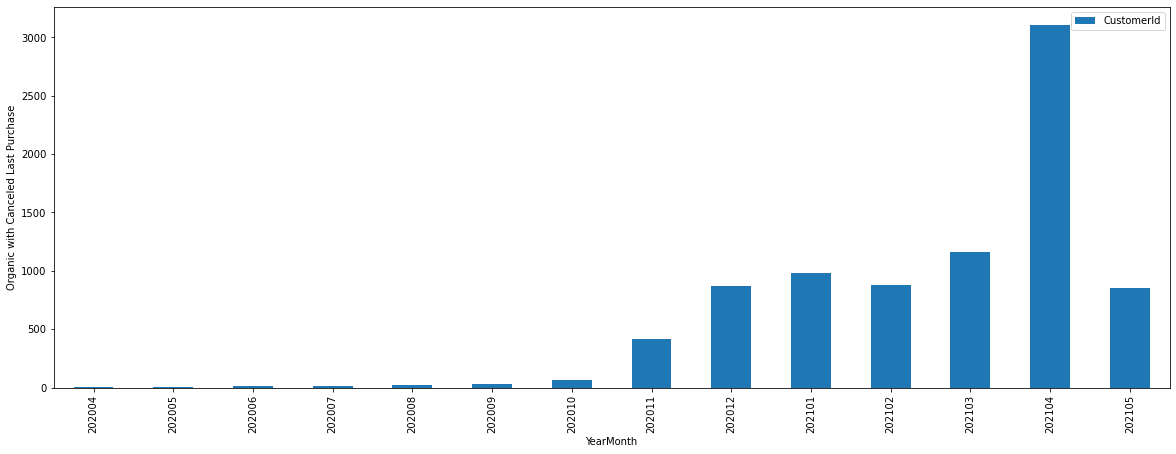

In [ ]:
CanceledLastPurchase_OrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Organic with Canceled Last Purchase')

CanceledLastPurchase_OrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).describe()

# Returned last order

4138 1372 150867 33901


,CustomerId
count,14.000000
mean,295.571429
std,405.254282
min,1.000000
25%,6.000000
50%,74.500000
75%,477.250000
max,1429.000000


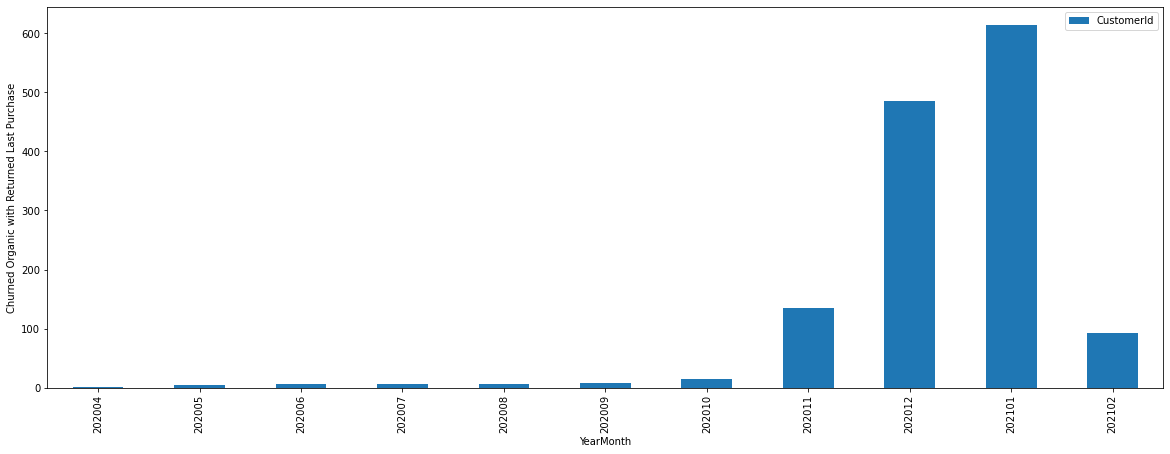

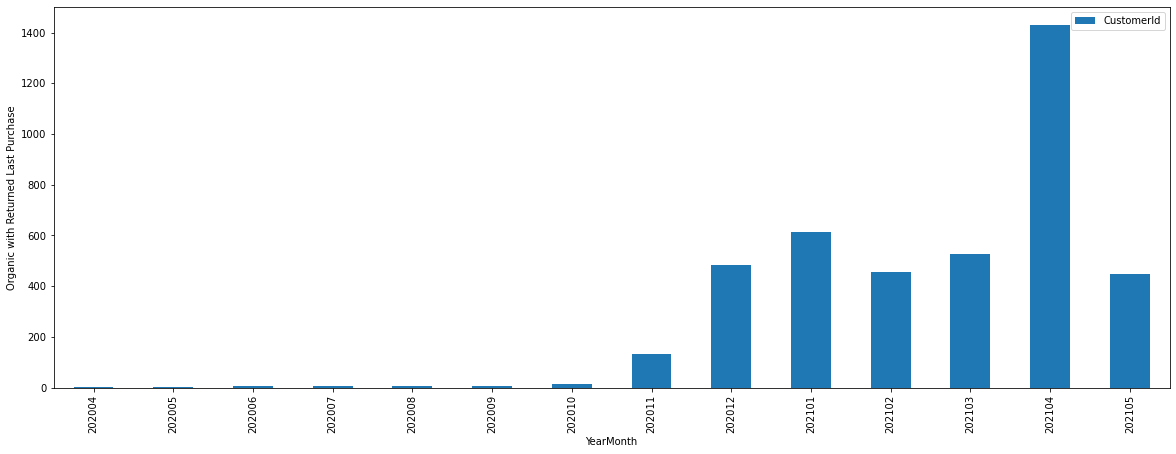

In [ ]:
ReturnedLastPurchase = LastPurchase[LastPurchase.OrderId.isin(ReturnedOrders.OrderId)]

ReturnedLastPurchase_OrganicCustomers = ReturnedLastPurchase[
    ReturnedLastPurchase.CustomerId.isin(OrganicCustomers.CustomerId)]

ReturnedLastPurchase_ChurnedOrganicCustomers = ReturnedLastPurchase_OrganicCustomers[
    ReturnedLastPurchase_OrganicCustomers.CustomerId.isin(ChurnedCustomers.CustomerId)]

print(ReturnedLastPurchase_OrganicCustomers.CustomerId.nunique() , 
     ReturnedLastPurchase_ChurnedOrganicCustomers.CustomerId.nunique(), 
     ReturnedOrders.OrderId.nunique(), 
     ReturnedLastPurchase.OrderId.nunique())

ReturnedLastPurchase_ChurnedOrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Churned Organic with Returned Last Purchase')

ReturnedLastPurchase_ChurnedOrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).describe()

ReturnedLastPurchase_OrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Organic with Returned Last Purchase')

ReturnedLastPurchase_OrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).describe()

# Delayed last order

25486 10968 641343 127705


,CustomerId
count,15.000000
mean,1699.066667
std,2387.451345
min,10.000000
25%,70.500000
50%,246.000000
75%,2482.500000
max,8705.000000


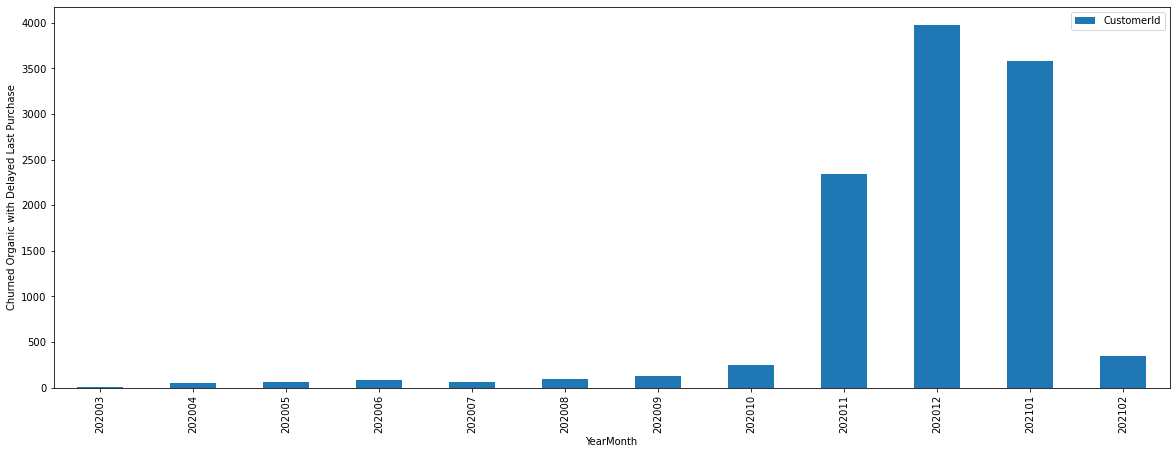

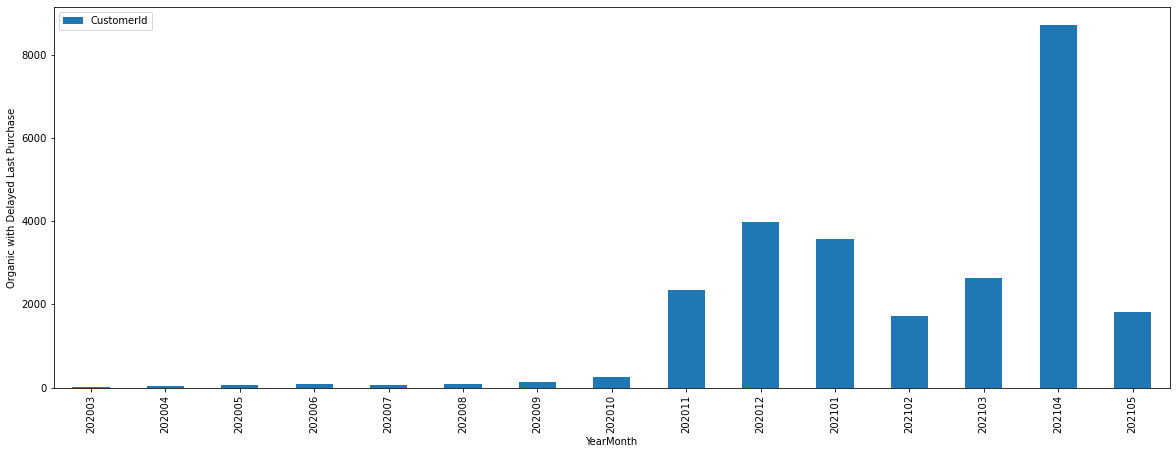

In [ ]:
DelayedLastPurchase = LastPurchase[LastPurchase.OrderId.isin(DelayedOrders.OrderId)]

DelayedLastPurchase_OrganicCustomers = DelayedLastPurchase[
    DelayedLastPurchase.CustomerId.isin(OrganicCustomers.CustomerId)]

DelayedLastPurchase_ChurnedOrganicCustomers = DelayedLastPurchase_OrganicCustomers[
    DelayedLastPurchase_OrganicCustomers.CustomerId.isin(ChurnedCustomers.CustomerId)]

print(DelayedLastPurchase_OrganicCustomers.CustomerId.nunique() , 
     DelayedLastPurchase_ChurnedOrganicCustomers.CustomerId.nunique(), 
     DelayedOrders.OrderId.nunique(), 
     DelayedLastPurchase.OrderId.nunique())

DelayedLastPurchase_ChurnedOrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Churned Organic with Delayed Last Purchase')

DelayedLastPurchase_ChurnedOrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).describe()

DelayedLastPurchase_OrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Organic with Delayed Last Purchase')

DelayedLastPurchase_OrganicCustomers.groupby('YearMonth').agg({
    'CustomerId':'nunique'
}).describe()

# Bayse's Theorem

P(A \in B) = (number of Canceled & churned).(number of Organic) / (number of churned)^2}

In [ ]:
DataOrders_cleaned_nmu.columns

Index(['OrderId', 'CustomerId', 'StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice', 'OrderState', 'OrderStatus',
       'OrderItemState', 'Delay', 'YearMonth', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount', 'Date',
       'Organic', 'FirstOrganic', 'CustomerState'],
      dtype='object')

In [ ]:
OrganicDataOrders = DataOrders_cleaned_nmu.merge(OrganicCustomers.drop(columns=['CustomerState']) , 
                                                left_on = 'CustomerId' , 
                                                right_on = 'CustomerId')


In [ ]:
OrganicDataOrders_grouped = OrganicDataOrders.groupby('YearMonth')

In [ ]:
Months = OrganicDataOrders.sort_values(by='YearMonth').YearMonth.unique()

In [ ]:
Months

array([202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010,
       202011, 202012, 202101, 202102, 202103, 202104, 202105],
      dtype=int64)

In [ ]:
P_churned_gived_canceled = pd.DataFrame()
x = locals()
for M in Months:
    x['LastPurchasesOfMonth_'+str(M)] = OrganicDataOrders_grouped.get_group(M).groupby('CustomerId').agg({
    'OrderId':'max' , 'YearMonth':'mean' 
    }).reset_index().rename(columns = {
    'OrderId':'LastOrderOfMonth'
    })
    
    x['LastPurchasesOfMonthCanceled_'+str(M)] = x['LastPurchasesOfMonth_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(CanceledOrders.OrderId)]
    
    x['LastPurchasesOfMonthCanceledChurned_'+str(M)] = x['LastPurchasesOfMonthCanceled_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(ChurnedOrganicCustomers.OrderId)]
    
    x['LastPurchasesOfMonthChurned_'+str(M)] = x['LastPurchasesOfMonth_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(ChurnedOrganicCustomers.OrderId)]
    
    P = x['LastPurchasesOfMonthCanceledChurned_'+str(M)].CustomerId.nunique()/x['LastPurchasesOfMonthCanceled_'+str(M)].CustomerId.nunique()
    
    d = {'P': [P], 'YearMonth': [M]}
    P_churned_gived_canceled = P_churned_gived_canceled.append(pd.DataFrame(data=d))
    

<ipython-input-137-17271103bfa4>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x['LastPurchasesOfMonthCanceledChurned_'+str(M)] = x['LastPurchasesOfMonthCanceled_'+str(M)][


In [ ]:
P_churned_gived_canceled

,P,YearMonth
0,0.000000,202003
0,0.005579,202004
0,0.006881,202005
0,0.007952,202006
0,0.012669,202007
0,0.013443,202008
0,0.021908,202009
0,0.022592,202010
0,0.126185,202011
0,0.219474,202012


,P
count,15.000000
mean,0.048768
std,0.082489
min,0.000000
25%,0.002789
50%,0.012669
75%,0.032678
max,0.252081


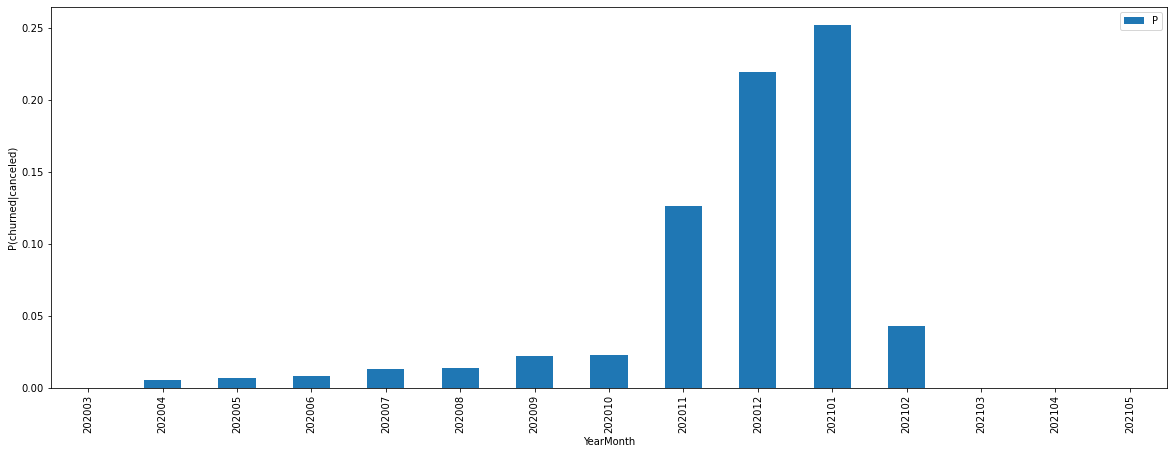

In [ ]:
P_churned_gived_canceled.groupby('YearMonth').agg({
    'P':'first'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('P(churned|canceled)')

P_churned_gived_canceled.groupby('YearMonth').agg({
    'P':'first'
}).describe()

# Returned Churned vs Non returned

In [ ]:
ReturnedOrders = DataOrders_cleaned_nmu[DataOrders_cleaned_nmu.OrderState==6].drop(columns={
      'CustomerId','StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice', 'OrderState', 'OrderStatus',
       'OrderItemState', 'Delay', 'YearMonth', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount', 'Date',
       'Organic', 'FirstOrganic'
}).drop_duplicates().reset_index(drop=True)

# ReturnedChurnedOrganicCustomers = ChurnedOrganicCustomers[ChurnedOrganicCustomers.OrderId.isin(ReturnedOrders.OrderId)]

# NonReturnedChurnedOrganicCustomers = ChurnedOrganicCustomers[~ChurnedOrganicCustomers.OrderId.isin(ReturnedOrders.OrderId)]

In [ ]:
ReturnedChurnedOrganicCustomers.groupby('ChurnYearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('Churned Organic with Returned Last Purchase')


NameError: name 'ReturnedChurnedOrganicCustomers' is not defined

<AxesSubplot:xlabel='ChurnYearMonth'>

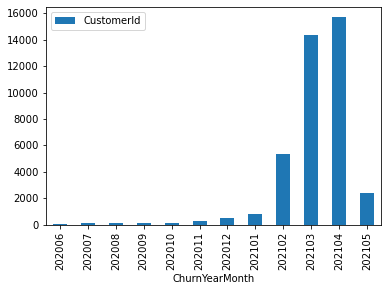

In [ ]:
NonReturnedChurnedOrganicCustomers.groupby('ChurnYearMonth').agg({
    'CustomerId':'nunique'
}).plot(kind = 'bar')


In [ ]:
P_churned_gived_returned = pd.DataFrame()
x = locals()
for M in Months:
    x['LastPurchasesOfMonth_'+str(M)] = OrganicDataOrders_grouped.get_group(M).groupby('CustomerId').agg({
    'OrderId':'max' , 'YearMonth':'mean' 
    }).reset_index().rename(columns = {
    'OrderId':'LastOrderOfMonth'
    })
    
    x['LastPurchasesOfMonthReturned_'+str(M)] = x['LastPurchasesOfMonth_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(ReturnedOrders.OrderId)]
    
    x['LastPurchasesOfMonthReturnedChurned_'+str(M)] = x['LastPurchasesOfMonthReturned_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(ChurnedOrganicCustomers.OrderId)]
    
    P = x['LastPurchasesOfMonthReturnedChurned_'+str(M)].CustomerId.nunique()/x['LastPurchasesOfMonthReturned_'+str(M)].CustomerId.nunique()
    
    d = {'P': [P], 'YearMonth': [M]}
    P_churned_gived_returned = P_churned_gived_returned.append(pd.DataFrame(data=d))


<ipython-input-161-260cb57a4be0>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x['LastPurchasesOfMonthReturnedChurned_'+str(M)] = x['LastPurchasesOfMonthReturned_'+str(M)][


Text(0, 0.5, 'P(churned|returned)')

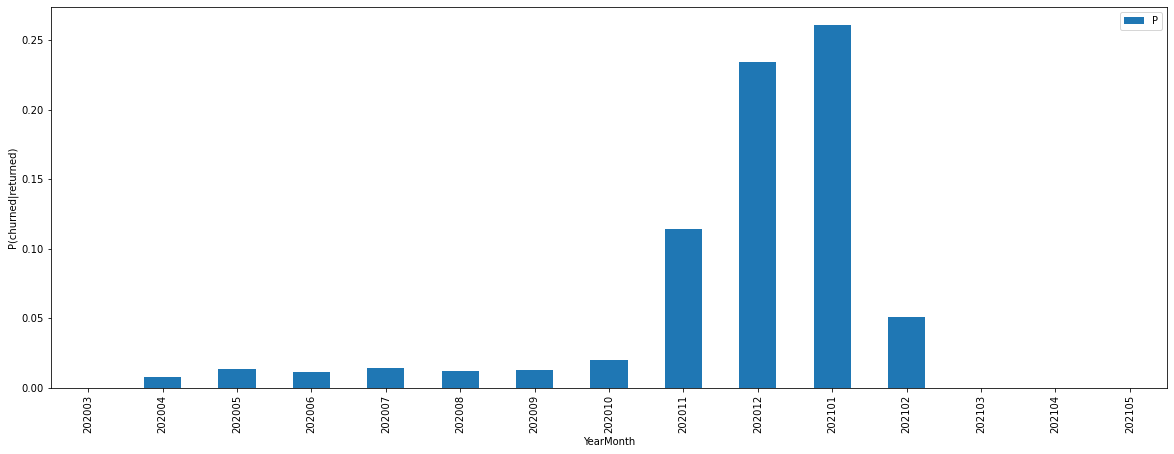

In [ ]:

P_churned_gived_returned.groupby('YearMonth').agg({
    'P':'first'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('P(churned|returned)')


In [ ]:

P_churned_gived_returned.groupby('YearMonth').agg({
    'P':'first'
}).describe()


,P
count,15.000000
mean,0.049968
std,0.085397
min,0.000000
25%,0.003650
50%,0.012456
75%,0.035500
max,0.260767


# Churned due to delay

<ipython-input-191-ad6113b30fd1>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x['LastPurchasesOfMonthDelayedChurned_'+str(M)] = x['LastPurchasesOfMonthDelayed_'+str(M)][


,P
count,15.000000
mean,0.026273
std,0.043981
min,0.000000
25%,0.003502
50%,0.005613
75%,0.021416
max,0.138033


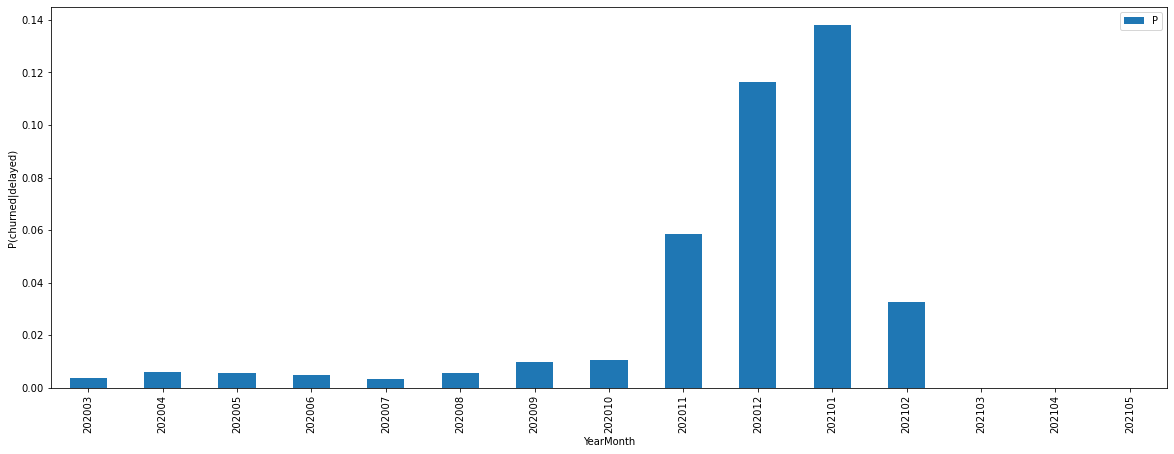

In [ ]:
DelayedOrders = DataOrders_cleaned_nmu[DataOrders_cleaned_nmu['Delay'].fillna(0)>0].drop(columns={
     'CustomerId', 'StoreId', 'ProductId', 'Quantity',
       'ConsumerPrice', 'OkalaPrice', 'OrderState', 'OrderStatus',
       'OrderItemState', 'Delay', 'YearMonth', 'Day', 'IsPostpone',
       'DiffToPreviousOrderMinute', 'DiscountID', 'DiscountAmount', 'Date',
       'Organic', 'FirstOrganic'
}).drop_duplicates().reset_index(drop=True)

# DelayedChurnedOrganicCustomers = ChurnedOrganicCustomers[ChurnedOrganicCustomers.OrderId.isin(DelayedOrders.OrderId)]

# NonDelayedChurnedOrganicCustomers = ChurnedOrganicCustomers[~ChurnedOrganicCustomers.OrderId.isin(DelayedOrders.OrderId)]

# DelayedChurnedOrganicCustomers.groupby('ChurnYearMonth').agg({
#     'CustomerId':'nunique'
# }).plot(kind = 'bar')

# NonDelayedChurnedOrganicCustomers.groupby('ChurnYearMonth').agg({
#     'CustomerId':'nunique'
# }).plot(kind = 'bar')
P_churned_gived_delayed = pd.DataFrame()
x = locals()
for M in Months:
    x['LastPurchasesOfMonth_'+str(M)] = OrganicDataOrders_grouped.get_group(M).groupby('CustomerId').agg({
    'OrderId':'max' , 'YearMonth':'mean' 
    }).reset_index().rename(columns = {
    'OrderId':'LastOrderOfMonth'
    })
    
    x['LastPurchasesOfMonthDelayed_'+str(M)] = x['LastPurchasesOfMonth_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(DelayedOrders.OrderId)]
    
    x['LastPurchasesOfMonthDelayedChurned_'+str(M)] = x['LastPurchasesOfMonthDelayed_'+str(M)][
        x['LastPurchasesOfMonth_'+str(M)].LastOrderOfMonth.isin(ChurnedOrganicCustomers.OrderId)]
    
    P = x['LastPurchasesOfMonthDelayedChurned_'+str(M)].CustomerId.nunique()/x['LastPurchasesOfMonthDelayed_'+str(M)].CustomerId.nunique()
    
    d = {'P': [P], 'YearMonth': [M]}
    P_churned_gived_delayed = P_churned_gived_delayed.append(pd.DataFrame(data=d))
P_churned_gived_delayed.groupby('YearMonth').agg({
    'P':'first'
}).plot(kind = 'bar',figsize = (20,7))
plt.ylabel('P(churned|delayed)')

P_churned_gived_delayed.groupby('YearMonth').agg({
    'P':'first'
}).describe()

In [ ]:
P_churned_gived_delayed

,P,YearMonth
0,0.003750,202003
0,0.006024,202004
0,0.005440,202005
0,0.004610,202006
0,0.003255,202007
0,0.005613,202008
0,0.009676,202009
0,0.010425,202010
0,0.058302,202011
0,0.116559,202012


# Active Customers by month

In [ ]:
ActiveCustomers = LastPurchase[LastPurchase['Churn']==0].sort_values(by='LastOrderDate').reset_index(drop = True)

In [ ]:
TotActive = DataOrders_cleaned_nmu[~DataOrders_cleaned_nmu.CustomerId.isin(ChurnedCustomers.CustomerId)]

In [ ]:
MonthlyChurned = ChurnedCustomers.groupby('ChurnYearMonth').agg({
    'CustomerId':'nunique'
}).reset_index().rename(columns={
    'CustomerId':'NumOfChurned'
})

In [ ]:
Months = DataOrders_cleaned_nmu.YearMonth.unique()

Customers = pd.DataFrame({'YearMonth' : Months,
    'NumOfCustomers': [DataOrders_cleaned_nmu.loc[DataOrders_cleaned_nmu['YearMonth'] <= Months[i],
                                              'CustomerId'].nunique() for i in range(len(Months))]})

In [ ]:
Monthly = MonthlyChurned.merge(Customers , left_on = 'ChurnYearMonth' , right_on='YearMonth')
Monthly['ChurnToTotal'] = Monthly['NumOfChurned']*100/Monthly['NumOfCustomers']
Monthly['ChurnToActive'] = Monthly['NumOfChurned']*100/(Monthly['NumOfCustomers']-Monthly['NumOfChurned'])

<AxesSubplot:>

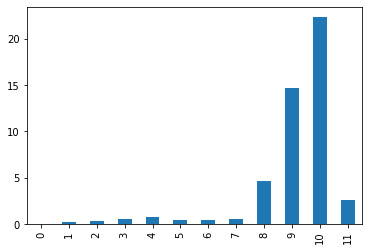

In [ ]:
Monthly.ChurnToActive.plot(kind = 'bar')

In [ ]:
Monthly.describe()

,ChurnYearMonth,NumOfChurned,YearMonth,NumOfCustomers,ChurnToTotal,ChurnToActive
count,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000
mean,202048.166667,38772.083333,202048.166667,6.326857e+05,3.457600,3.980298
std,48.438965,72139.837002,48.438965,4.650817e+05,5.906135,7.119198
min,202006.000000,43.000000,202006.000000,8.185200e+04,0.052534,0.052561
25%,202008.750000,1031.000000,202008.750000,2.140735e+05,0.408302,0.410016
50%,202011.500000,2419.000000,202011.500000,5.223850e+05,0.562458,0.565649
75%,202102.250000,36093.250000,202102.250000,1.083828e+06,3.051948,3.155579
max,202105.000000,225329.000000,202105.000000,1.249341e+06,18.273554,22.359413


In [ ]:
MonthlyChurned.describe()

,ChurnYearMonth,NumOfChurned
count,12.000000,12.000000
mean,202048.166667,38772.083333
std,48.438965,72139.837002
min,202006.000000,43.000000
25%,202008.750000,1031.000000
50%,202011.500000,2419.000000
75%,202102.250000,36093.250000
max,202105.000000,225329.000000
